<a href="https://colab.research.google.com/github/Eskarteek/Eskarteek_DATA606/blob/main/EDA/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to my Notebook

In [2]:
# pip install snscrape

In [3]:
#pip install yfinance

In [4]:
# importing libraries and packages
#import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [5]:
symbol = input("Enter the stock symbol: ")

Enter the stock symbol: AAPL


In [7]:
data = pd.read_csv('/content/nasdaq_screener_1645401938081.csv')

In [8]:
data_dict = {}

In [9]:
for i in range(len(data)):
  data_dict[data.iloc[i][0]] = [data.iloc[i][1], data.iloc[i][2]]

In [10]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 5.4 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [11]:
import yfinance as yf

In [12]:
inp = yf.Ticker(symbol)

In [13]:
inp.news

[{'link': 'https://finance.yahoo.com/m/5e9706a2-d66c-3d05-af01-9da8b50df8ec/dow-jones-futures-signal.html',
  'providerPublishTime': 1646007377,
  'publisher': "Investor's Business Daily",
  'title': "Dow Jones Futures Signal 'Swift' Market Reversal As Russia Bank Targeted Amid Ukraine Invasion",
  'type': 'STORY',
  'uuid': '5e9706a2-d66c-3d05-af01-9da8b50df8ec'},
 {'link': 'https://finance.yahoo.com/m/a3289340-767e-3109-a7e1-ea0a31efba6a/berkshire-hathaway-earnings%3A.html',
  'providerPublishTime': 1645980813,
  'publisher': 'Investopedia',
  'title': 'Berkshire Hathaway Earnings: What Happened with BRK.A',
  'type': 'STORY',
  'uuid': 'a3289340-767e-3109-a7e1-ea0a31efba6a'},
 {'link': 'https://finance.yahoo.com/news/1-norways-sovereign-wealth-fund-145543336.html',
  'providerPublishTime': 1645973743,
  'publisher': 'Reuters',
  'title': "UPDATE 1-Norway's sovereign wealth fund to vote against Apple management's pay plan",
  'type': 'STORY',
  'uuid': '9645d118-fcc8-3c50-8504-209c9d

In [14]:
df = pd.DataFrame()
title = []
newslist = []
for i in range(len(inp.news)):
  site = inp.news[i]['link']
  r = requests.get(site)
  soup = BeautifulSoup(r.text)
  try:
    newslist.append(soup.find('div', attrs={'class': 'caas-body'}).text)
    title.append(inp.news[i]['title'])
  except:
    pass
  

In [15]:
df['Title'] = title

In [16]:
df['News'] = newslist

In [17]:
df

,Title,News
0,Dow Jones Futures Signal 'Swift' Market Revers...,Dow Jones futures signal a market rally revers...
1,UPDATE 1-Norway's sovereign wealth fund to vot...,"(Adds quote, background)OSLO, Feb 27 (Reuters)..."
2,Worried About the Market Correction? 3 Tech St...,With both the S&P 500 and Nasdaq Composite in ...
3,Should SoFi Investors Worry About Goldman Sach...,"In this clip from ""The Future of Fintech"" on M..."
4,5 Top Stocks for March,This motley collection of companies is an intr...
5,Warren Buffett Comes to the Rescue of Tim Cook,Tim Cook must have felt good while reading the...
6,"Ukrainian official urges Apple, Google, Meta’s...","The vice prime minister of Ukraine's letter, p..."


In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
vader = SentimentIntensityAnalyzer()
scores = df['News'].apply(vader.polarity_scores).tolist()
df['Score'] = scores

In [21]:
df

,Title,News,Score
0,Dow Jones Futures Signal 'Swift' Market Revers...,Dow Jones futures signal a market rally revers...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,UPDATE 1-Norway's sovereign wealth fund to vot...,"(Adds quote, background)OSLO, Feb 27 (Reuters)...","{'neg': 0.037, 'neu': 0.85, 'pos': 0.113, 'com..."
2,Worried About the Market Correction? 3 Tech St...,With both the S&P 500 and Nasdaq Composite in ...,"{'neg': 0.031, 'neu': 0.927, 'pos': 0.042, 'co..."
3,Should SoFi Investors Worry About Goldman Sach...,"In this clip from ""The Future of Fintech"" on M...","{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp..."
4,5 Top Stocks for March,This motley collection of companies is an intr...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp..."
5,Warren Buffett Comes to the Rescue of Tim Cook,Tim Cook must have felt good while reading the...,"{'neg': 0.023, 'neu': 0.84, 'pos': 0.137, 'com..."
6,"Ukrainian official urges Apple, Google, Meta’s...","The vice prime minister of Ukraine's letter, p...","{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp..."


In [26]:
pn = []
for i in df['Score']:
    if i['compound'] > 0:    
        pn.append(1)
    elif i['compound'] < 0:
        pn.append(-1)
    else:
      pn.append(0)

In [29]:
df['Sentiment Poles'] = pn

In [30]:
df

,Title,News,Score,Sentiment Poles
0,Dow Jones Futures Signal 'Swift' Market Revers...,Dow Jones futures signal a market rally revers...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0
1,UPDATE 1-Norway's sovereign wealth fund to vot...,"(Adds quote, background)OSLO, Feb 27 (Reuters)...","{'neg': 0.037, 'neu': 0.85, 'pos': 0.113, 'com...",1
2,Worried About the Market Correction? 3 Tech St...,With both the S&P 500 and Nasdaq Composite in ...,"{'neg': 0.031, 'neu': 0.927, 'pos': 0.042, 'co...",1
3,Should SoFi Investors Worry About Goldman Sach...,"In this clip from ""The Future of Fintech"" on M...","{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",-1
4,5 Top Stocks for March,This motley collection of companies is an intr...,"{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'comp...",1
5,Warren Buffett Comes to the Rescue of Tim Cook,Tim Cook must have felt good while reading the...,"{'neg': 0.023, 'neu': 0.84, 'pos': 0.137, 'com...",1
6,"Ukrainian official urges Apple, Google, Meta’s...","The vice prime minister of Ukraine's letter, p...","{'neg': 0.072, 'neu': 0.928, 'pos': 0.0, 'comp...",-1


In [46]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
sw = nltk.corpus.stopwords.words("english")
lemma = nltk.stem.wordnet.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [56]:
#pip install nltk
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

Dow Jones futures signal a market rally reversal as the West ramps up sanctions vs. Russia banks amid the ongoing Ukraine invasion.


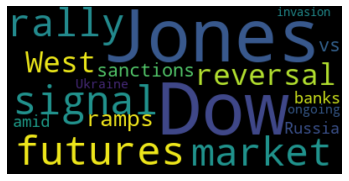

[('Dow', 1), ('Jones', 1), ('future', 1), ('signal', 1), ('market', 1), ('rally', 1), ('reversal', 1), ('West', 1), ('ramp', 1), ('sanction', 1), ('vs.', 1), ('Russia', 1), ('bank', 1), ('amid', 1), ('ongoing', 1), ('Ukraine', 1), ('invasion.', 1)]
(Adds quote, background)OSLO, Feb 27 (Reuters) - Norway's $1.3 trillion sovereign wealth fund, the world's largest, will vote against ratification of tech giant Apple Inc's management remuneration plan after an advisory firm urged investors to act, the fund's manager said on Sunday.The Norwegian fund owns 1.03% of Apple's shares, making it the company's eighth largest shareholder, according to Refinitiv data.The maker of iPhones, computers and other devices is due to hold its annual meeting of shareholders on March 4.Chief Executive Tim Cook's pay in 2021 was 1,447 times that of the average Apple employee, a company filing on Jan. 7 showed, fuelled by stock awards that helped him earn a total of $98.7 million.Proxy advisory firm Institutiona

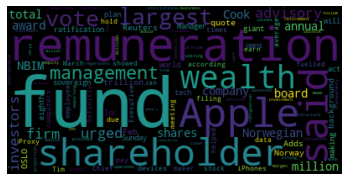

[('remuneration', 3), ('wealth', 2), ('fund,', 2), ('vote', 2), ('Apple', 2), ('advisory', 2), ('firm', 2), ('urged', 2), ('investor', 2), ('said', 2), ('Norwegian', 2), ('annual', 2), ("Cook's", 2), ('total', 2), ('board', 2), ('(Adds', 1), ('quote,', 1), ('background)OSLO,', 1), ('Feb', 1), ('27', 1)]
With both the S&P 500 and Nasdaq Composite in correction territory, many investors may be worried about the current market conditions. Berkshire Hathaway CEO and renowned investor Warren Buffett has been known to say, "Our favorite holding period is forever." Danny Vena (Apple): The Nasdaq Composite began its decline into correction territory in mid-November, and since then the majority of high-growth stocks have taken it on the chin.


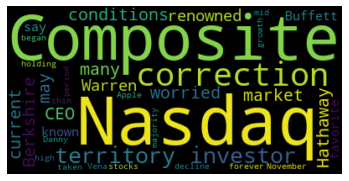

[('Nasdaq', 2), ('Composite', 2), ('correction', 2), ('investor', 2), ('With', 1), ('S&P', 1), ('500', 1), ('territory,', 1), ('many', 1), ('may', 1), ('worried', 1), ('current', 1), ('market', 1), ('conditions.', 1), ('Berkshire', 1), ('Hathaway', 1), ('CEO', 1), ('renowned', 1), ('Warren', 1), ('Buffett', 1)]
In this clip from "The Future of Fintech" on Motley Fool Live, recorded on Feb. 10, Motley Fool contributors Matt Frankel and Jason Hall discuss why they think Goldman Sachs (NYSE: GS) has underappreciated potential in its consumer banking business and how its brand name gives it an edge among the competition. Matt Frankel: What are your thoughts on Goldman Sachs and Marcus?


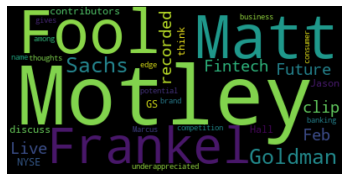

[('Motley', 2), ('Fool', 2), ('Matt', 2), ('Goldman', 2), ('Sachs', 2), ('In', 1), ('clip', 1), ('"The', 1), ('Future', 1), ('Fintech"', 1), ('Live,', 1), ('recorded', 1), ('Feb.', 1), ('10,', 1), ('contributor', 1), ('Frankel', 1), ('Jason', 1), ('Hall', 1), ('discus', 1), ('think', 1)]
This motley collection of companies is an intriguing mix of growth, value, and dividends all rolled into one.


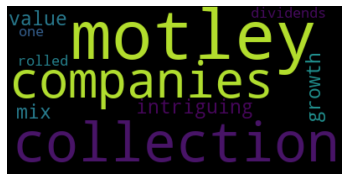

[('This', 1), ('motley', 1), ('collection', 1), ('company', 1), ('intriguing', 1), ('mix', 1), ('growth,', 1), ('value,', 1), ('dividend', 1), ('rolled', 1), ('one.', 1)]
Tim Cook must have felt good while reading the traditional letter sent every year by Warren Buffett to the shareholders of his Berkshire Hathaway conglomerate. The words used by Buffett to describe him must have filled Apple's CEO with happiness and comforted his confidence as they came at a time when Cook really needed them. Despite a track record that would make more than one CEO green with envy, Cook faces two fires that ignited at the same time and on two different fronts.


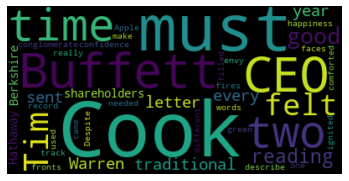

[('Cook', 3), ('must', 2), ('Buffett', 2), ('CEO', 2), ('time', 2), ('two', 2), ('Tim', 1), ('felt', 1), ('good', 1), ('reading', 1), ('traditional', 1), ('letter', 1), ('sent', 1), ('every', 1), ('year', 1), ('Warren', 1), ('shareholder', 1), ('Berkshire', 1), ('Hathaway', 1), ('conglomerate.', 1)]
The vice prime minister of Ukraine's letter, posted on Twitter, shows that he has asked Apple CEO Tim Cook to cut off Russia's access to the App Store.


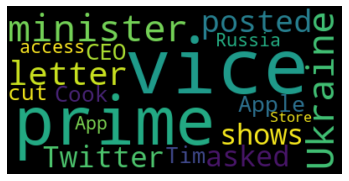

[('The', 1), ('vice', 1), ('prime', 1), ('minister', 1), ("Ukraine's", 1), ('letter,', 1), ('posted', 1), ('Twitter,', 1), ('show', 1), ('asked', 1), ('Apple', 1), ('CEO', 1), ('Tim', 1), ('Cook', 1), ('cut', 1), ("Russia's", 1), ('access', 1), ('App', 1), ('Store.', 1)]


In [55]:
for text in df['News']:
  print(text)
  words = text.split(' ')
  words = [word for word in words if word not in sw]
  words = [lemma.lemmatize(word) for word in words]
  fdist1 = nltk.FreqDist(words)
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
  print (fdist1.most_common(20))